In [1]:
# Import libraries and packages
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import SGD
from keras.layers import Conv2D, Dense, MaxPool2D, Dropout, Flatten
from imutils import paths
from IPython import display 

import numpy as np
import random
import pickle
import cv2
import os
import time   
import warnings
import pandas as pd
import xlrd
warnings.filterwarnings("ignore")


done = "done";
done ##it works! everything is imported!

'done'

In [3]:
########################################################################################################
#select the type of analysis , the only value you need to change to change the entire analyis type
# structure , semantic , appearance
label_path = "appearance"
amount_of_rounds_to_optimize = 140
number_of_network_chosen_to_train = 4
trained_imagas_preferred = "correct" # correct / incorrect

########################################################################################################

# initialize the data and labels
%matplotlib inline

print("Loading the pre-analyzed images")
time1 = time.time()   # to measure time taken
data = []
labels = []

DATADIR = r"C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN"

myImPath = "C:\\Users\\MT\\Desktop\\Diplomityo\\Kuvat_DNN\\Im1(1).png"


amount_of_pics = 80
sections = [1, 3, 5, 7, 9, 11, 13, 15, 17]
myImagePath =""
excelPath = "C:\\Users\\MT\\Desktop\\Diplomityo\\" + label_path + "_labels.xlsx"
df = pd.read_excel(io=excelPath)
amount_to_analyse = 80*9

for i in sections:
    for y in range(1,amount_of_pics+1):
        myImagePath = "C:\\Users\\MT\\Desktop\\Diplomityo\\Kuvat_DNN\\Im" + str(i) + "(" + str(y) + ").png"
        image = cv2.imread(myImagePath)
        image = cv2.resize(image, (32, 32)).flatten()
        data.append(image)

for i in range(amount_to_analyse):
    label = df.iloc[i,1]
    #print(label)
    labels.append(label)


data = np.array(data, dtype="float") / 255.0
labels = np.array(labels)

#print('Time taken: {:.1f} seconds'.format(time.time() - time1))   # to measure time taken
#print("done")

# partition the data into 80% training and 20% validation

(trainX, testX, trainY, testY) = train_test_split(data, labels, test_size=0.2) #the split is created randomly, each time that the

number_of_testing_index = []
index = 0
for i in testY:
    splitted = i.split(",")
    
    testY[index] = splitted[0]
    index = index +1
    
    number_of_testing_index.append(splitted[1])

index = 0


for i in trainY:
    splitted = i.split(",")
    trainY[index] = splitted[0]
    index = index +1    



lb = LabelBinarizer()
trainY = lb.fit_transform(trainY)   
testY = lb.transform(testY)         

if number_of_network_chosen_to_train == 1:

    model = Sequential()   
    model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   
    model.add(Dense(512, activation="sigmoid"))                         
    model.add(Dense(len(lb.classes_), activation="softmax"))            

if number_of_network_chosen_to_train == 2:
    #custom other ANNs go here
    #my own ANN/CNN is below, slightly altered for 4-6 outputs rather than 10 with numvers 

    model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
    model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
    model.add(Dense(128, activation="sigmoid"))                         # second hidden layer has 512 nodes
    model.add(Dense(64, activation="sigmoid"))                         # second hidden layer has 64 nodes
    model.add(Dense(32, activation="sigmoid"))                         # second hidden layer has 32 nodes
    model.add(Dense(16, activation="sigmoid"))                         # second hidden layer has 16 nodes
    model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

    #fails terribly, not a surpsire however quite odd that it fails 100%
    
if number_of_network_chosen_to_train == 3:
    #custom other ANNs go here, the default is the above one
    #my own ANN/CNN is below, slightly altered for 4-6 outputs rather than 10 with numvers 

    model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
    model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
    model.add(Dense(512, activation="sigmoid"))                         # second hidden layer has 512 nodes
    model.add(Dense(64, activation="sigmoid"))                         # second hidden layer has 64 nodes
    model.add(Dense(32, activation="sigmoid"))                         # second hidden layer has 64 nodes
    model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

    #fails less, custom made, based on 2D CNN
    
if number_of_network_chosen_to_train == 4:
    #custom other ANNs go here, the default is the above one
    #my own ANN/CNN is below, slightly altered for 4-6 outputs rather than 10 with numvers 

    model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
    model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
    #model.add(Dense(384, activation="sigmoid"))                         # second hidden layer has 512 nodes
    model.add(Dense(64, activation="relu"))                         # second hidden layer has 64 nodes
    model.add(Dense(32, activation="relu"))                         # second hidden layer has 64 nodes
    model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

    #fails less, custom made, based on 2D CNN
    
if number_of_network_chosen_to_train == 5:   #does not even intergrate, so... 
    
    model = Sequential()   # input layer 3072 as there are 32x32x3=3072 pixels in a flattened input image
    model.add(Dense(1024, input_shape=(3072,), activation="sigmoid"))   # first hidden layer has 1024 nodes
    model.add(Dense(512, activation="relu"))                         # second hidden layer has 512 nodes
    model.add(Dense(120, activation="relu"))                         # second hidden layer has 64 nodes
    model.add(Dense(60, activation="relu"))                         # second hidden layer has 64 nodes
    model.add(Dense(len(lb.classes_), activation="softmax"))            # output layer with number of possible class labels

    #fails less, custom made, based on 2D CNN

if number_of_network_chosen_to_train == 6:   #does not even intergrate, so... 
    model = Sequential()
    model.add(MaxPool2D(strides=4))
    model.add(Conv2D(filters=48, kernel_size=(5,5), padding='valid', activation='relu'))
    model.add(MaxPool2D(strides=2))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(84, activation='relu'))
    model.add(Dense(len(lb.classes_), activation='softmax'))
    

INIT_LR = 0.01
EPOCHS = amount_of_rounds_to_optimize #default was 200 
opt = SGD(lr=INIT_LR)   # Stochastic Gradient Descent (SGD) optimizer
model.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

done = "done";
done ##it works! everything is imported!

Loading the pre-analyzed images


'done'

Epoch 1/140
18/18 [==============================] - 10s 38ms/step - loss: 1.4995 - accuracy: 0.2742 - val_loss: 1.5023 - val_accuracy: 0.3472
Epoch 2/140
18/18 [==============================] - 0s 15ms/step - loss: 1.4323 - accuracy: 0.3475 - val_loss: 1.3988 - val_accuracy: 0.5139
Epoch 3/140
18/18 [==============================] - 0s 14ms/step - loss: 1.4048 - accuracy: 0.4307 - val_loss: 1.3604 - val_accuracy: 0.4653
Epoch 4/140
18/18 [==============================] - 0s 15ms/step - loss: 1.3694 - accuracy: 0.4257 - val_loss: 1.3414 - val_accuracy: 0.4236
Epoch 5/140
18/18 [==============================] - 0s 14ms/step - loss: 1.3350 - accuracy: 0.4397 - val_loss: 1.3159 - val_accuracy: 0.5486
Epoch 6/140
18/18 [==============================] - 0s 15ms/step - loss: 1.3231 - accuracy: 0.4494 - val_loss: 1.2907 - val_accuracy: 0.4514
Epoch 7/140
18/18 [==============================] - 0s 13ms/step - loss: 1.2964 - accuracy: 0.4718 - val_loss: 1.2665 - val_accuracy: 0.5069
Epoch

18/18 [==============================] - 0s 15ms/step - loss: 0.7087 - accuracy: 0.7243 - val_loss: 1.0452 - val_accuracy: 0.5347
Epoch 59/140
18/18 [==============================] - 0s 15ms/step - loss: 0.7624 - accuracy: 0.6682 - val_loss: 0.9874 - val_accuracy: 0.5625
Epoch 60/140
18/18 [==============================] - 0s 16ms/step - loss: 0.7500 - accuracy: 0.7032 - val_loss: 0.9388 - val_accuracy: 0.5972
Epoch 61/140
18/18 [==============================] - 0s 15ms/step - loss: 0.6873 - accuracy: 0.7358 - val_loss: 0.8181 - val_accuracy: 0.6597
Epoch 62/140
18/18 [==============================] - 0s 15ms/step - loss: 0.6727 - accuracy: 0.7188 - val_loss: 0.8568 - val_accuracy: 0.6250
Epoch 63/140
18/18 [==============================] - 0s 13ms/step - loss: 0.6311 - accuracy: 0.7611 - val_loss: 0.9760 - val_accuracy: 0.6042
Epoch 64/140
18/18 [==============================] - 0s 14ms/step - loss: 0.7806 - accuracy: 0.7086 - val_loss: 0.8352 - val_accuracy: 0.6667
Epoch 65/140

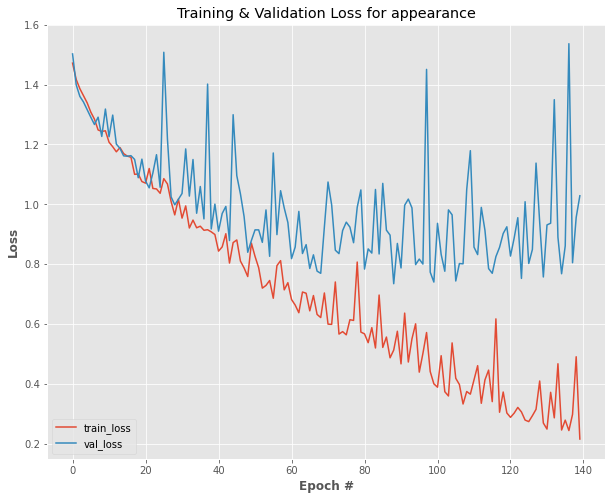

loss
accuracy
val_loss
val_accuracy


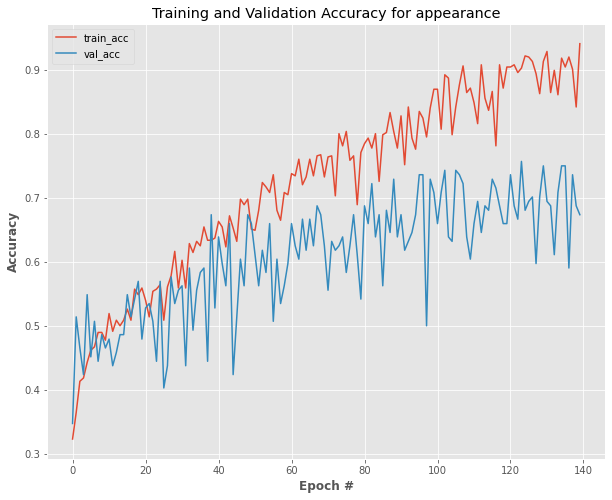

'done'

In [4]:
#EPOCHS = 200 
#if the rounds are not enough, the above can be uncommented to continue the optimization

time1 = time.time()   # to measure time taken
H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=EPOCHS, batch_size=32)
print('Time taken: {:.1f} seconds'.format(time.time() - time1))   

cv2.destroyAllWindows()
print("[INFO] evaluating network...")
predictions = model.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1), predictions.argmax(axis=1), target_names=lb.classes_))

N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.title("Training & Validation Loss for " + label_path)
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Loss", weight="bold")
plt.legend()
plt.show()


for key in H.history.keys():
    print(key)
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure(figsize = [10,8])
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training and Validation Accuracy for " + label_path)
plt.xlabel("Epoch #", weight="bold")
plt.ylabel("Accuracy", weight="bold")
plt.legend()
plt.show()

done = "done";
done ##it works! everything is imported!

C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(18).png
Most likely label is: Dark
Alleged label is: Bright , number;  18


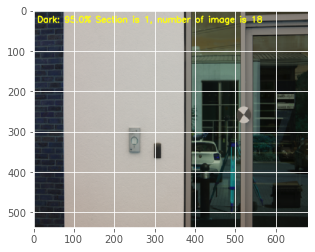

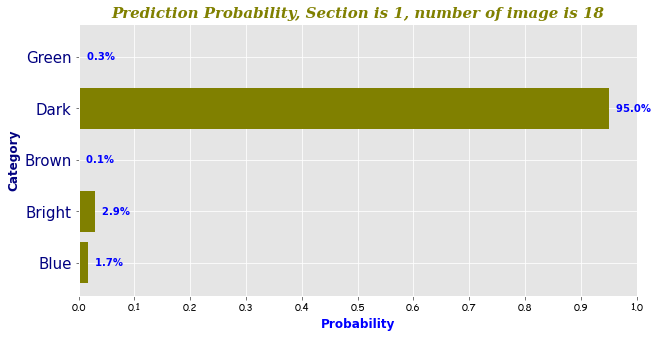

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(30).png
Most likely label is: Dark
Alleged label is: Bright , number;  30


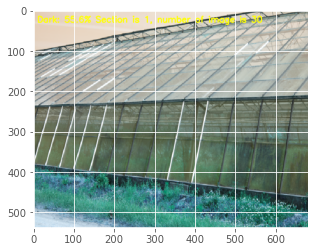

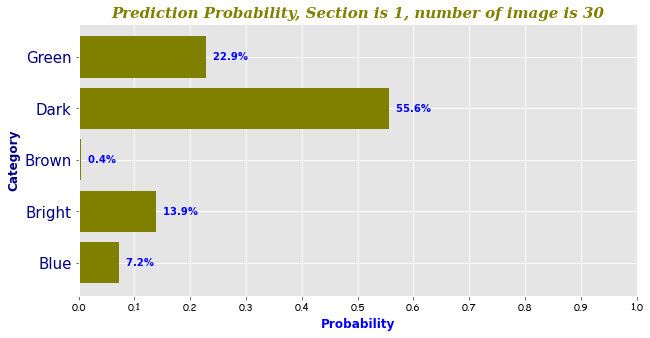

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(48).png
Most likely label is: Blue
Alleged label is: Brown , number;  48


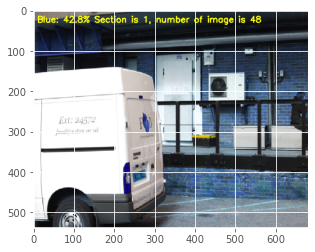

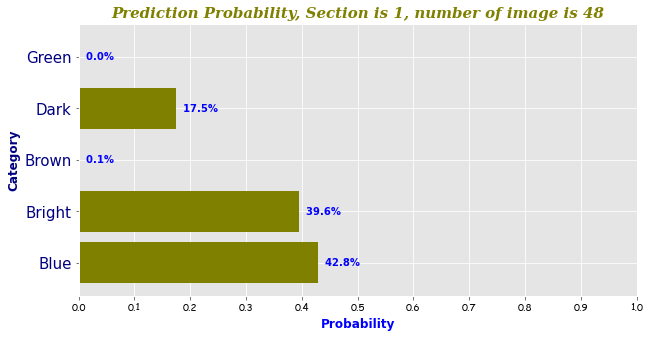

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(53).png
Most likely label is: Dark
Alleged label is: Blue , number;  53


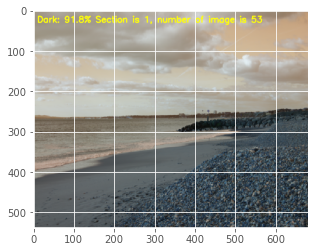

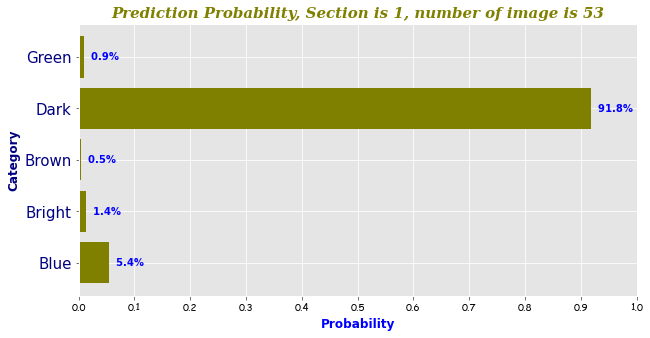

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(62).png
Most likely label is: Dark
Alleged label is: Green , number;  62


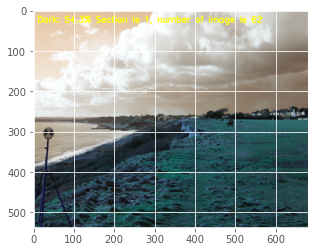

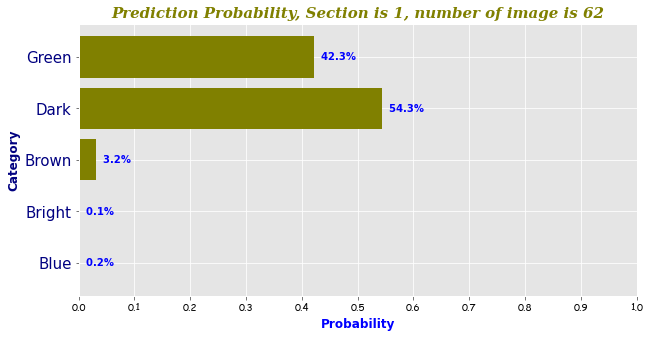

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(66).png
Most likely label is: Blue
Alleged label is: Bright , number;  66


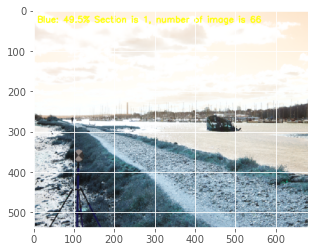

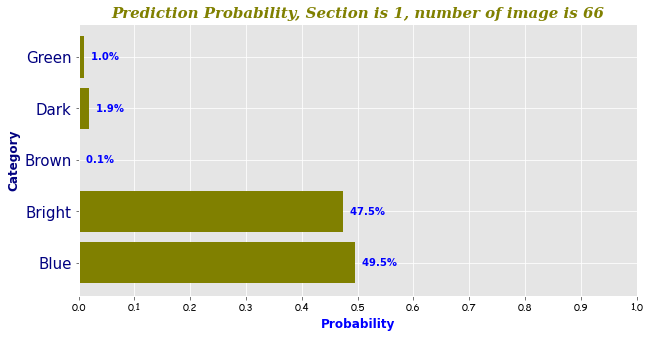

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im1(73).png
Most likely label is: Dark
Alleged label is: Brown , number;  73


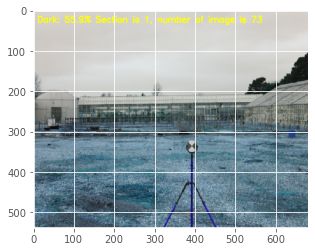

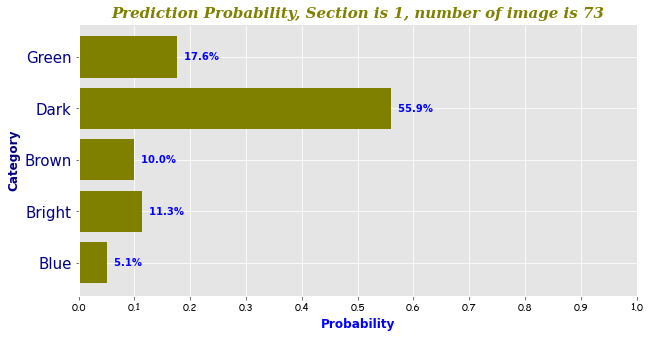

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im3(15).png
Most likely label is: Green
Alleged label is: Brown , number;  95


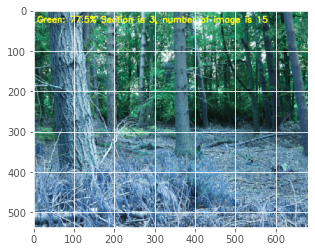

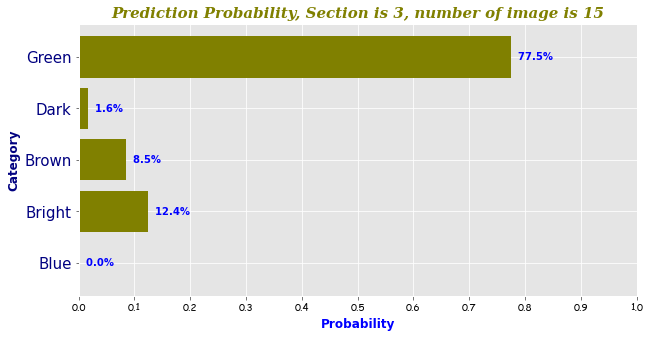

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im3(44).png
Most likely label is: Dark
Alleged label is: Green , number;  124


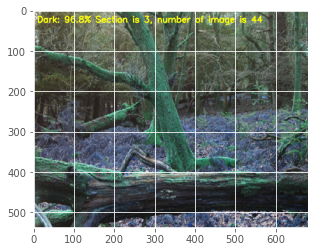

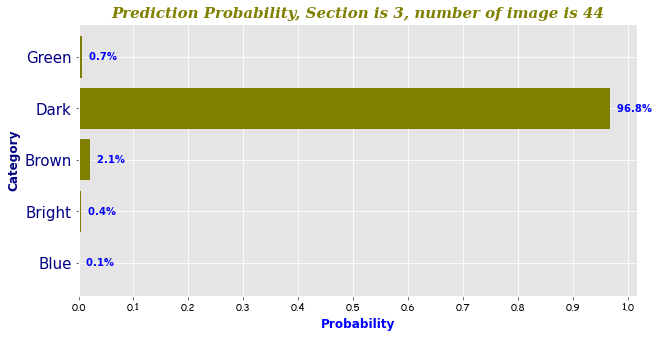

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im3(63).png
Most likely label is: Green
Alleged label is: Dark , number;  143


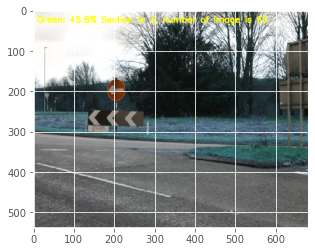

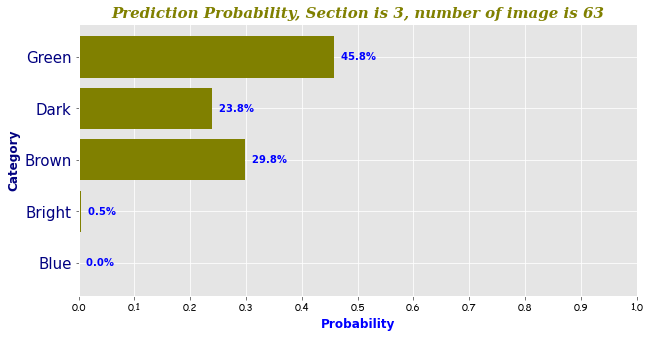

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im3(72).png
Most likely label is: Green
Alleged label is: Brown , number;  152


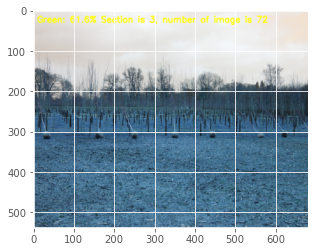

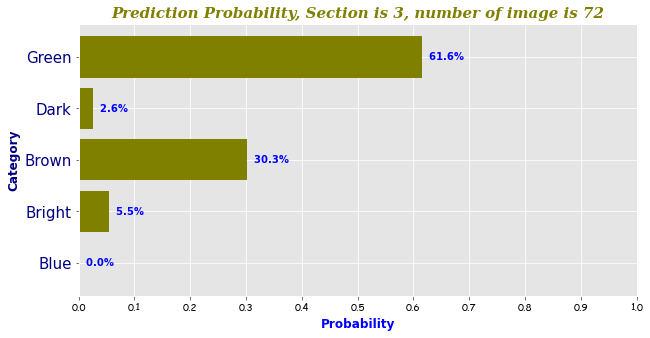

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(8).png
Most likely label is: Bright
Alleged label is: Green , number;  168


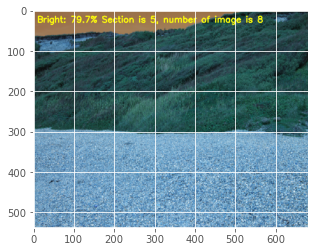

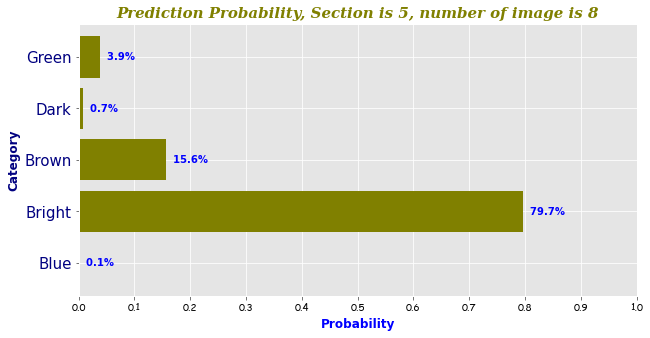

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(17).png
Most likely label is: Dark
Alleged label is: Bright , number;  177


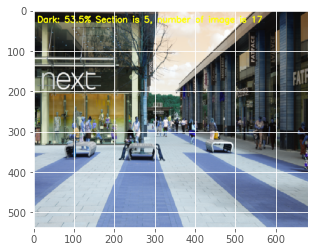

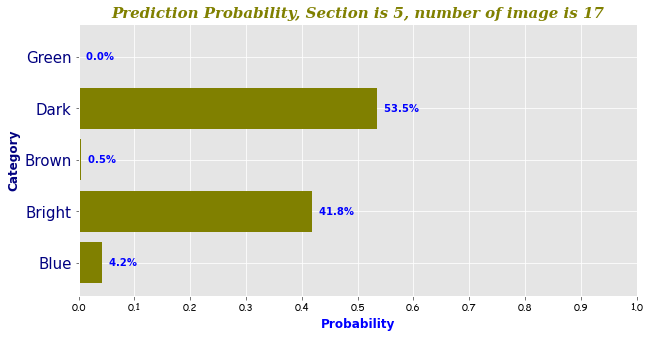

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(36).png
Most likely label is: Blue
Alleged label is: Bright , number;  196


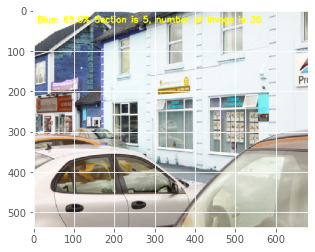

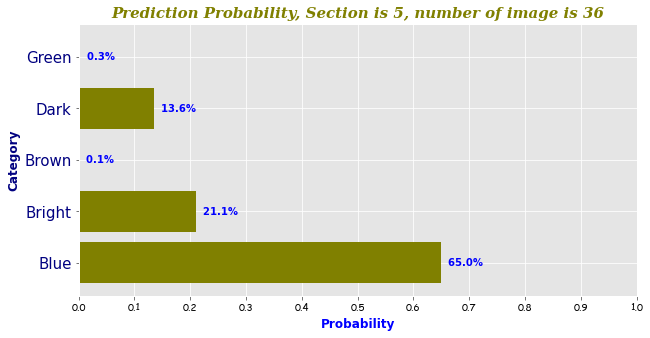

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(41).png
Most likely label is: Dark
Alleged label is: Brown , number;  201


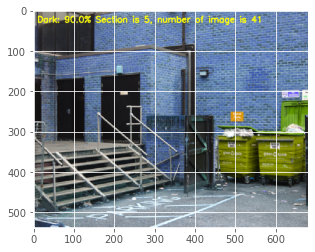

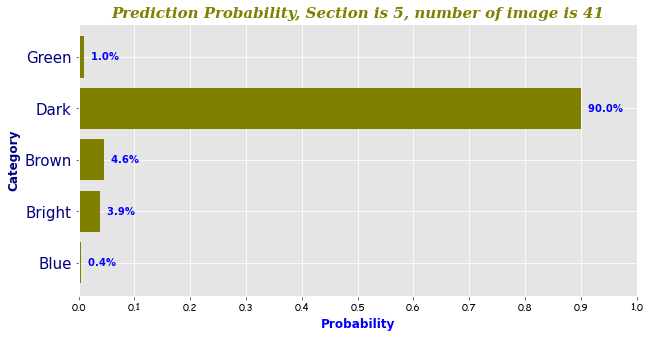

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(44).png
Most likely label is: Dark
Alleged label is: Green , number;  204


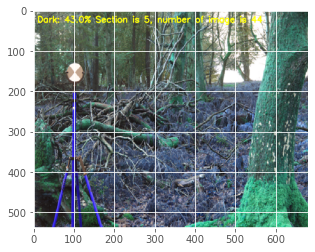

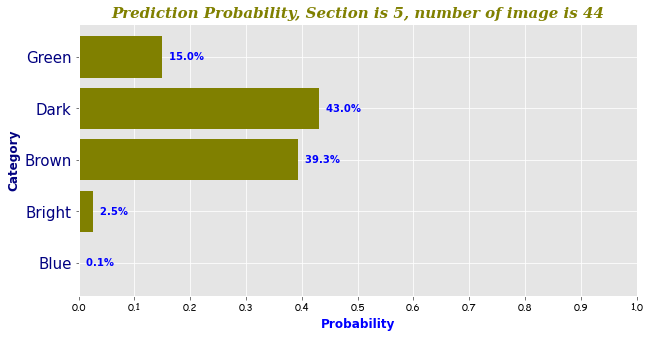

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(53).png
Most likely label is: Brown
Alleged label is: Dark , number;  213


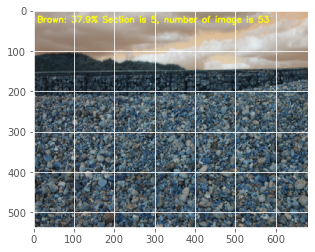

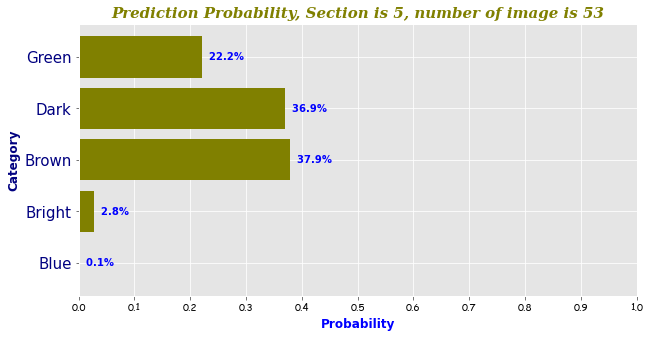

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(59).png
Most likely label is: Green
Alleged label is: Brown , number;  219


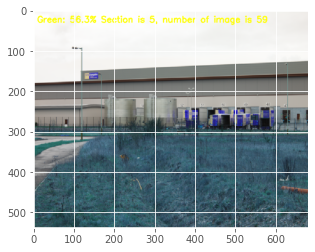

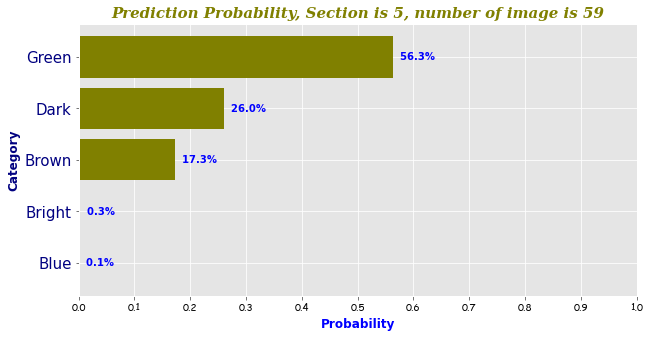

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(62).png
Most likely label is: Dark
Alleged label is: Bright , number;  222


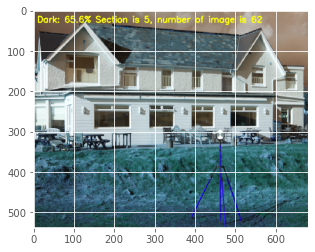

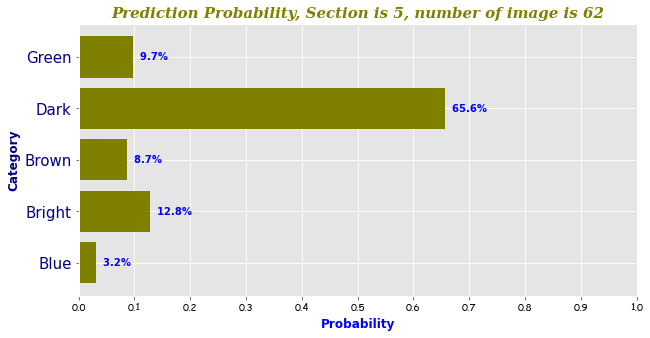

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(66).png
Most likely label is: Dark
Alleged label is: Blue , number;  226


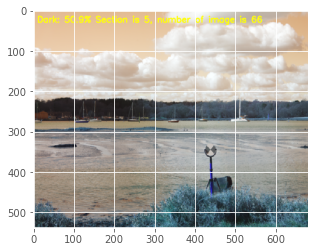

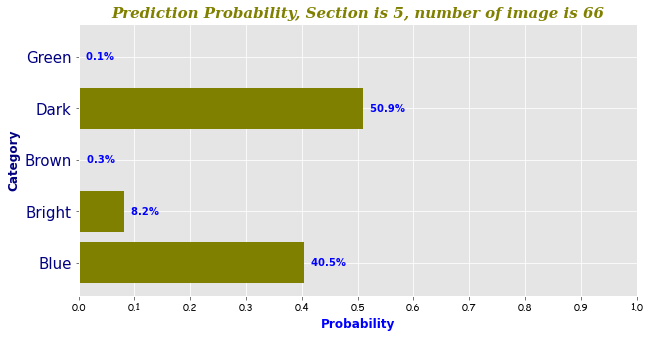

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(79).png
Most likely label is: Dark
Alleged label is: Brown , number;  239


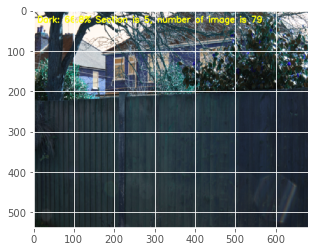

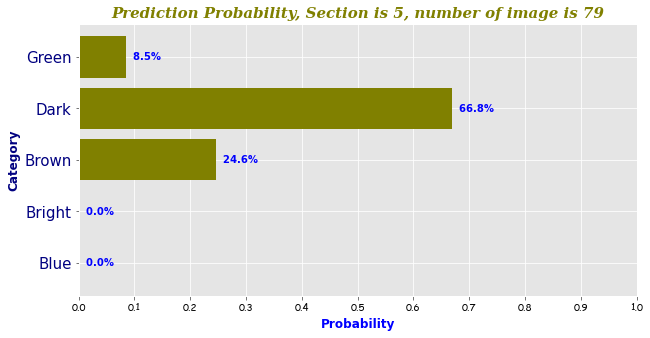

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im5(80).png
Most likely label is: Green
Alleged label is: Bright , number;  240


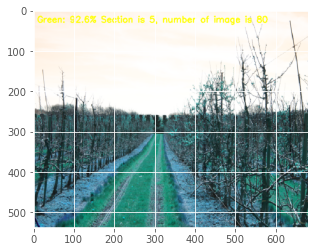

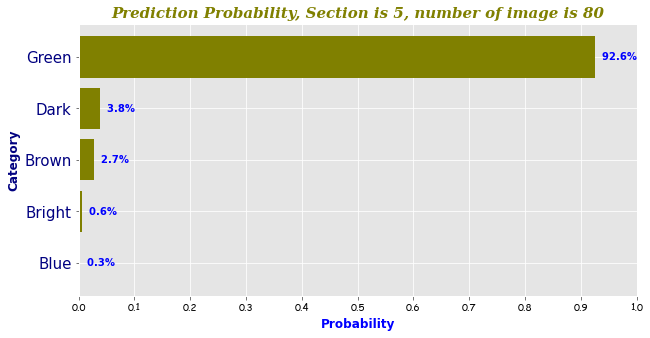

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im7(13).png
Most likely label is: Dark
Alleged label is: Brown , number;  253


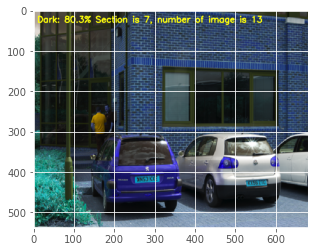

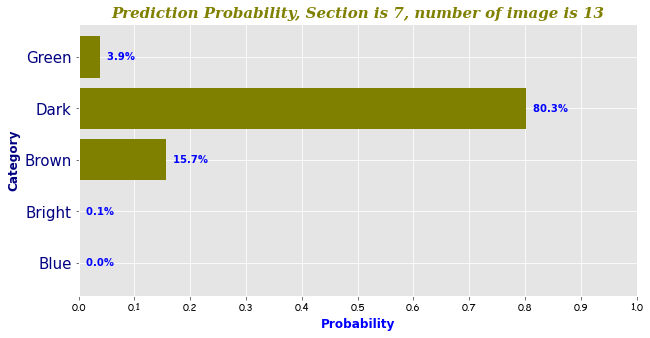

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im7(44).png
Most likely label is: Brown
Alleged label is: Green , number;  284


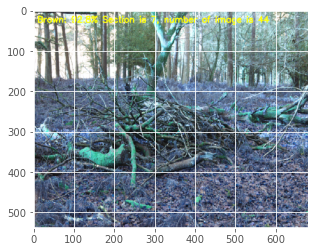

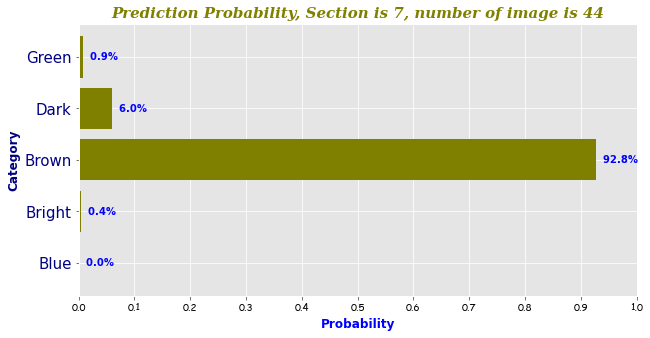

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im7(53).png
Most likely label is: Dark
Alleged label is: Brown , number;  293


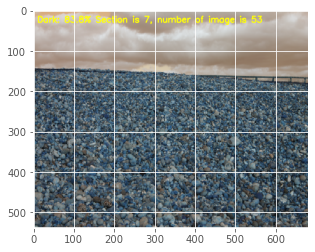

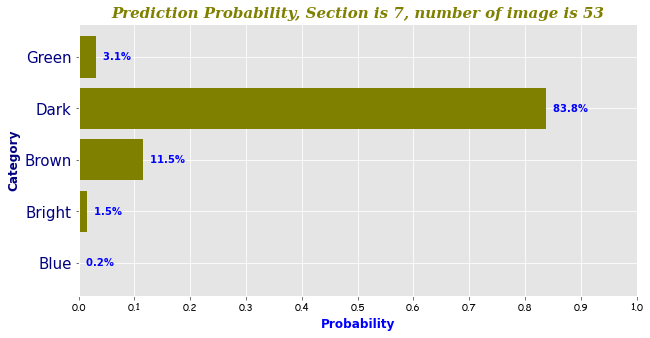

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im7(59).png
Most likely label is: Green
Alleged label is: Brown , number;  299


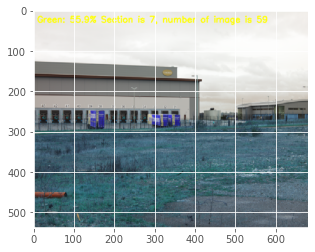

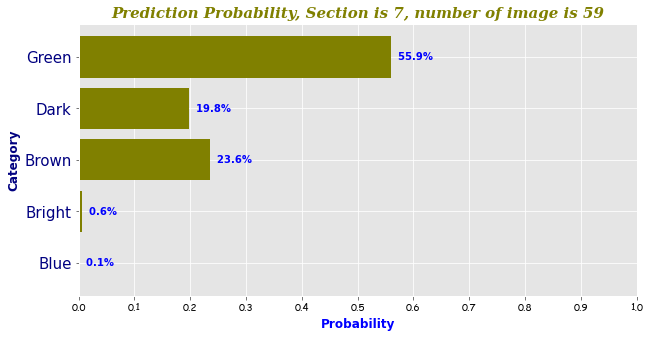

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im7(72).png
Most likely label is: Green
Alleged label is: Brown , number;  312


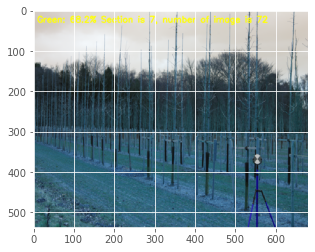

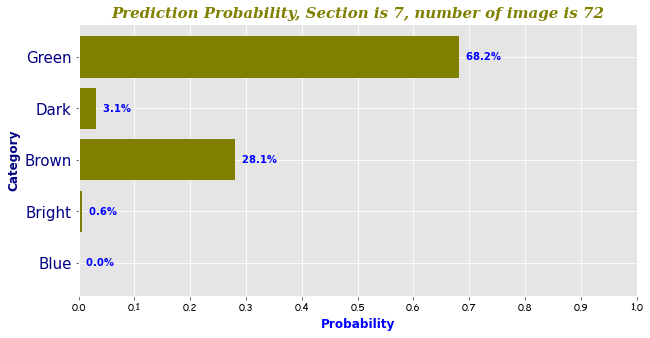

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(18).png
Most likely label is: Green
Alleged label is: Bright , number;  338


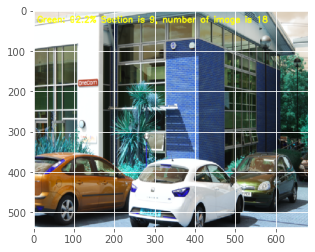

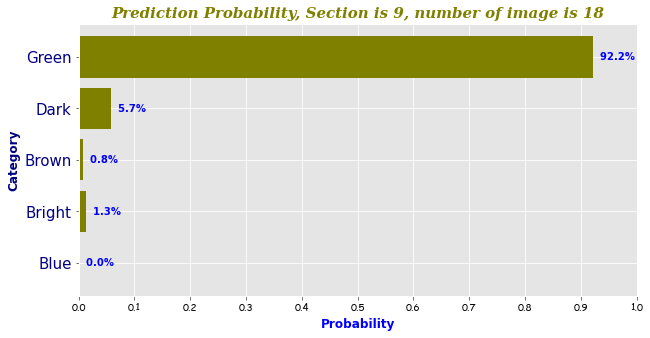

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(27).png
Most likely label is: Dark
Alleged label is: Brown , number;  347


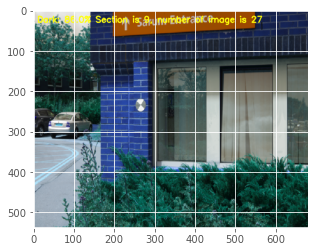

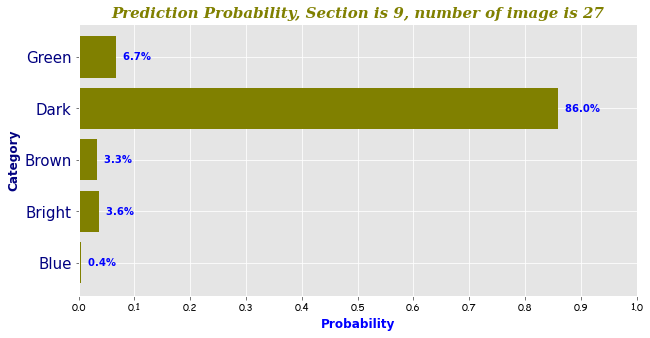

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(31).png
Most likely label is: Dark
Alleged label is: Bright , number;  351


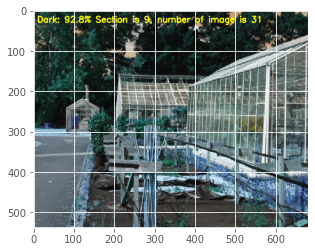

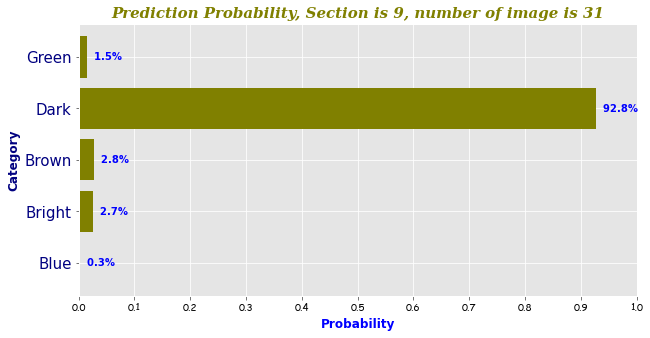

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(40).png
Most likely label is: Dark
Alleged label is: Brown , number;  360


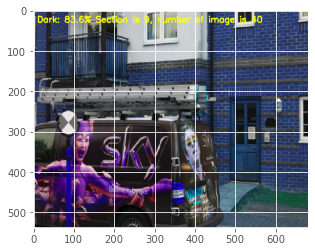

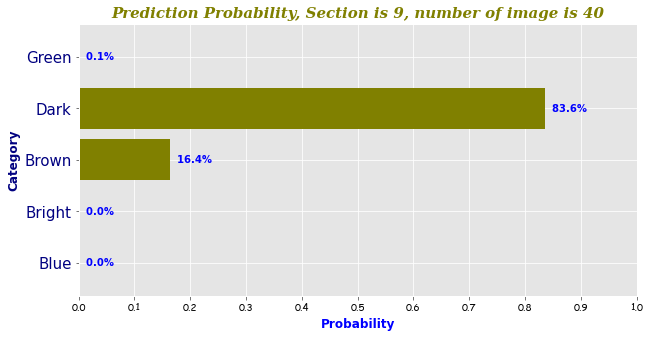

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(45).png
Most likely label is: Green
Alleged label is: Brown , number;  365


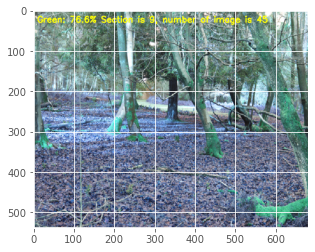

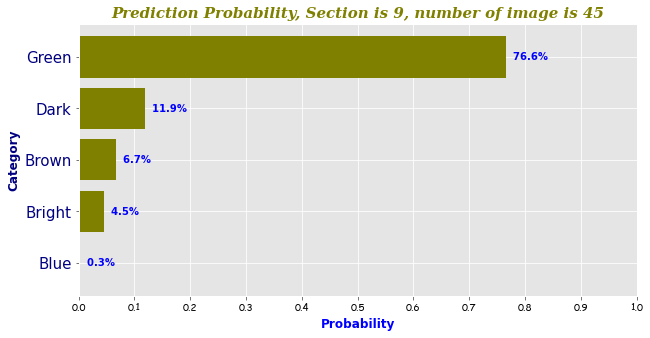

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(52).png
Most likely label is: Green
Alleged label is: Bright , number;  372


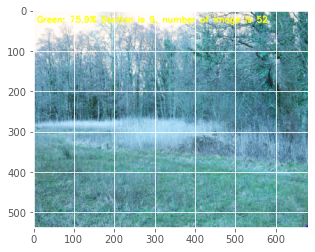

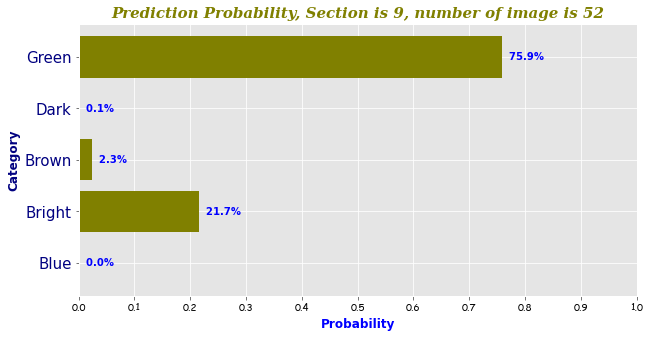

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(53).png
Most likely label is: Dark
Alleged label is: Brown , number;  373


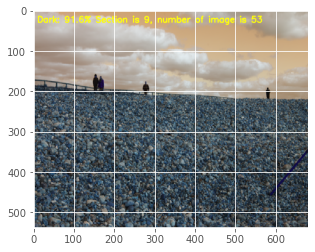

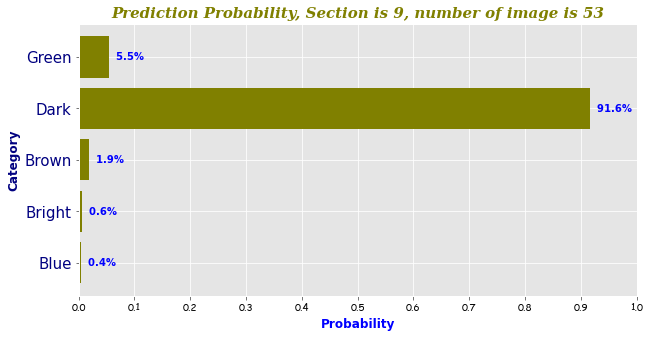

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(60).png
Most likely label is: Dark
Alleged label is: Bright , number;  380


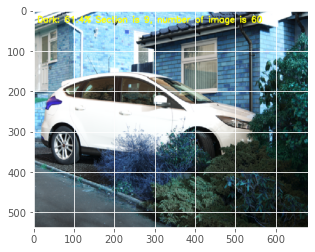

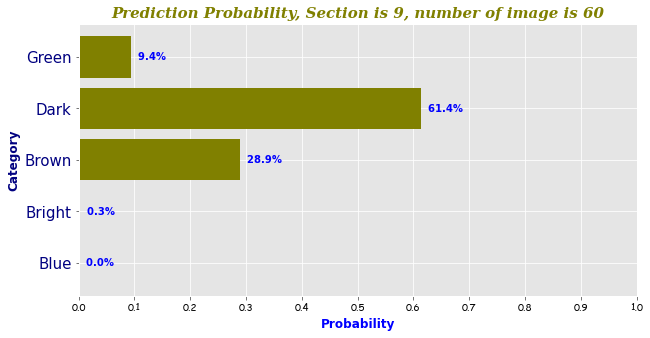

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(72).png
Most likely label is: Green
Alleged label is: Brown , number;  392


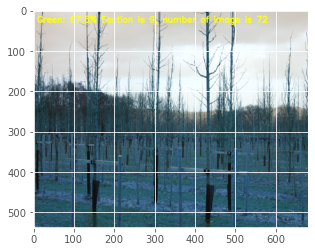

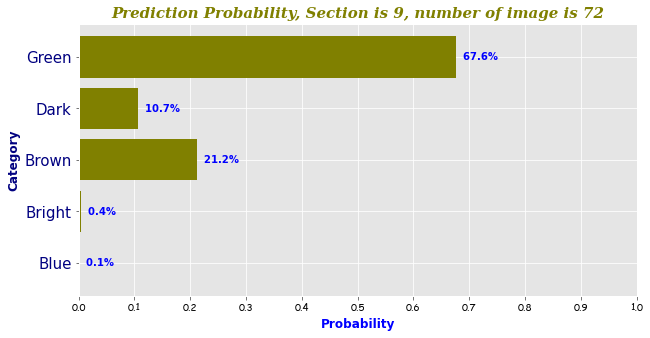

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(74).png
Most likely label is: Green
Alleged label is: Dark , number;  394


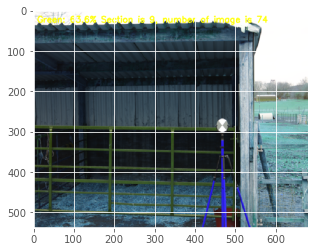

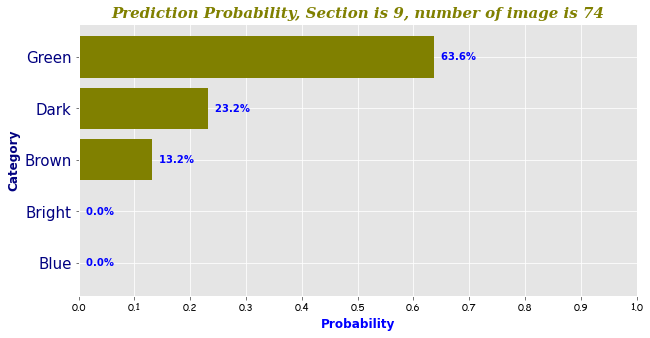

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im9(80).png
Most likely label is: Green
Alleged label is: Brown , number;  400


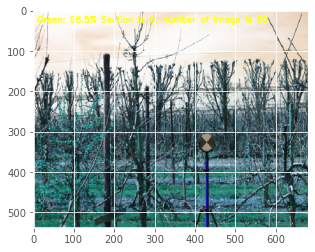

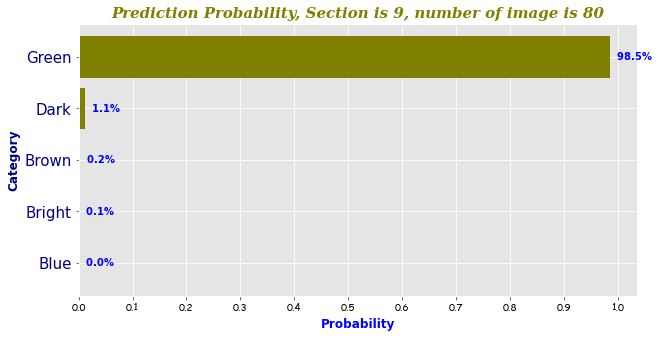

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im11(33).png
Most likely label is: Green
Alleged label is: Bright , number;  433


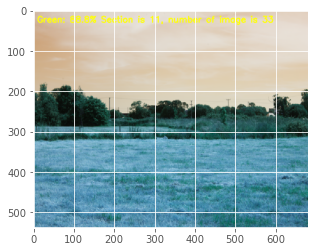

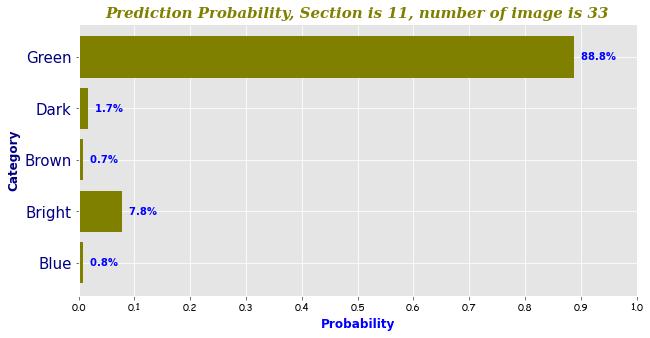

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im11(42).png
Most likely label is: Dark
Alleged label is: Bright , number;  442


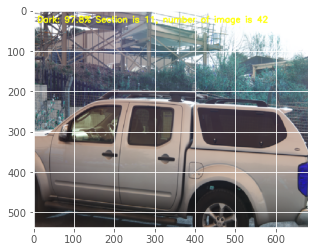

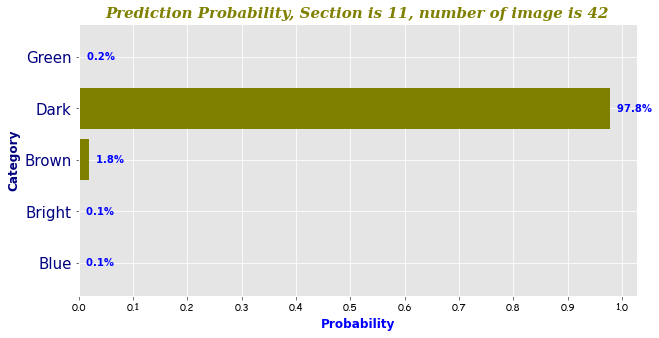

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im13(70).png
Most likely label is: Dark
Alleged label is: Brown , number;  550


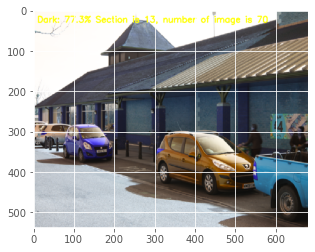

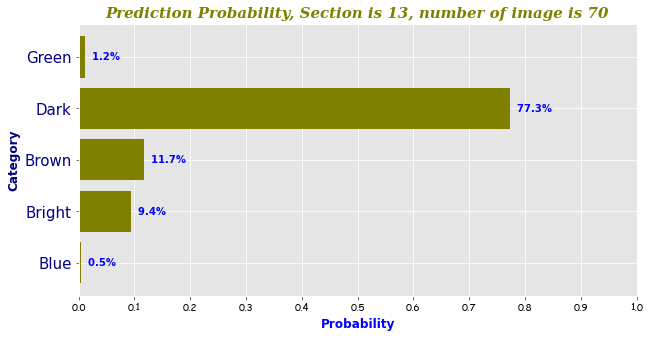

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im15(46).png
Most likely label is: Dark
Alleged label is: Brown , number;  606


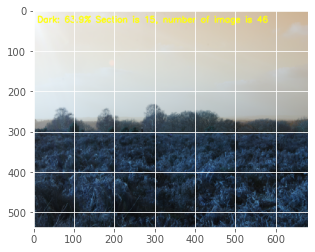

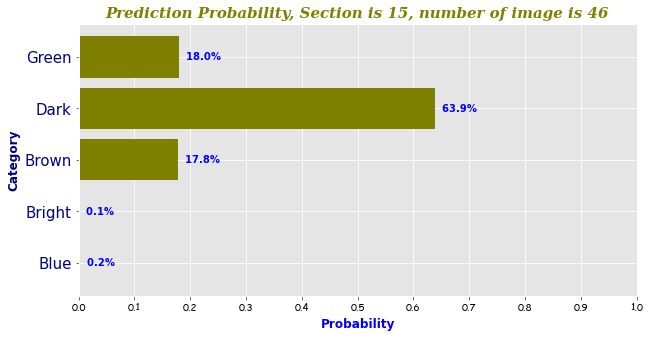

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im15(67).png
Most likely label is: Dark
Alleged label is: Brown , number;  627


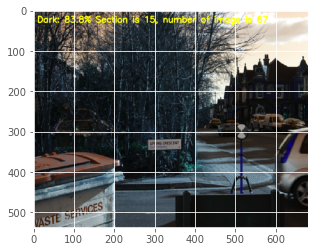

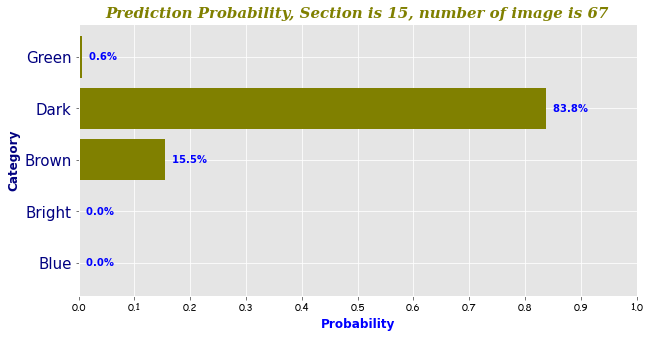

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im15(78).png
Most likely label is: Green
Alleged label is: Bright , number;  638


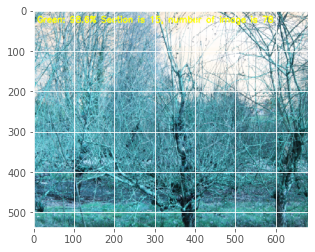

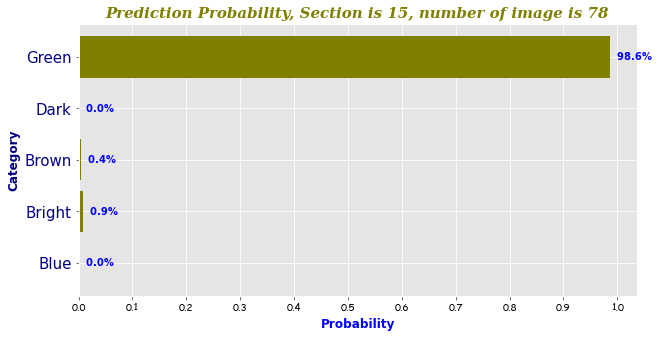

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im17(25).png
Most likely label is: Green
Alleged label is: Bright , number;  665


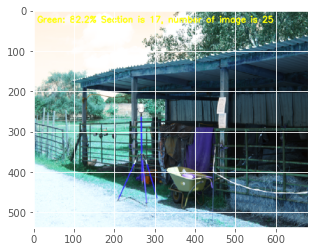

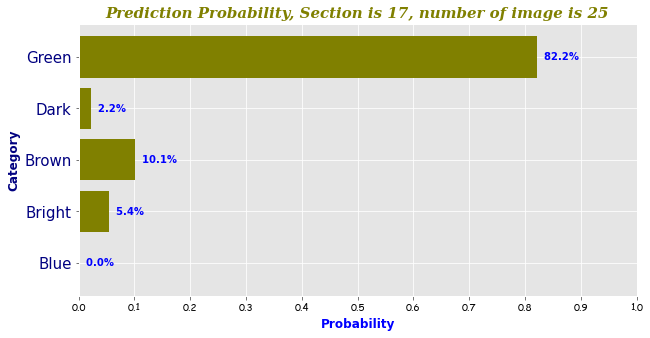

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im17(55).png
Most likely label is: Green
Alleged label is: Dark , number;  695


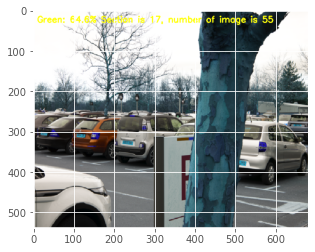

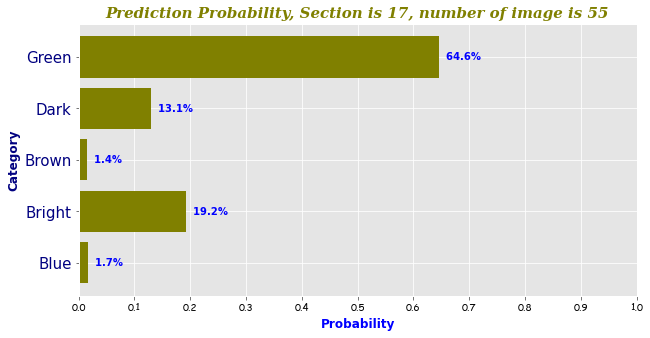

Next section is below.
C:\Users\MT\Desktop\Diplomityo\Kuvat_DNN\Im17(65).png
Most likely label is: Dark
Alleged label is: Brown , number;  705


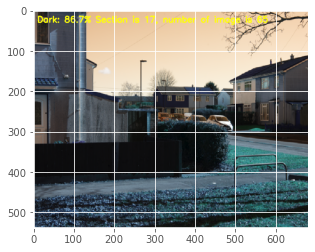

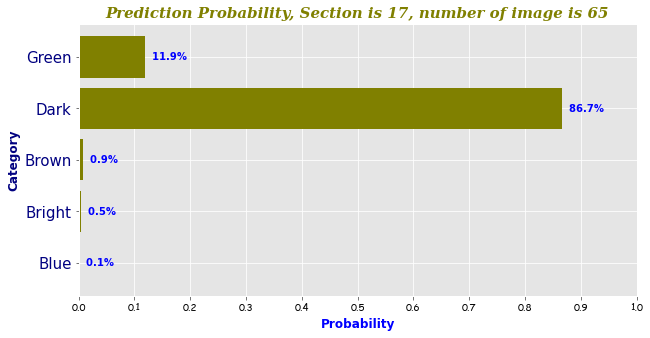

Next section is below.


'done'

In [5]:
## This section is for plotting the images
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
cv2.destroyAllWindows()

amount_of_pics = 80
sections = [1, 3, 5, 7, 9, 11, 13, 15, 17]
myImagePath =""
excelPath = "C:\\Users\\MT\\Desktop\\Diplomityo\\" + label_path + "_labels.xlsx"
df = pd.read_excel(io=excelPath)
amount_to_analyse = 80*9
labels = []
i_counter = 0
number_counter = 0


for i_sect in sections:
    for y in range(1,amount_of_pics+1):
        number_of_section = y
        # load the input image and resize it to the target spatial dimensions
        number_counter = number_counter +1
        width = 32
        height = 32
        myImagePath = "C:\\Users\\MT\\Desktop\\Diplomityo\\Kuvat_DNN\\Im" + str(i_sect) + "(" + str(y) + ").png"
        image = cv2.imread(myImagePath)
        output = image.copy()
        image = cv2.resize(image, (width, height))

        # scale the pixel values to [0, 1]
        image = image.astype("float") / 255.0

        # for a simple fully-connected network, flatten the image
        image = image.flatten()
        image = image.reshape((1, image.shape[0]))
        preds = model.predict(image)
        # find the class label index with the largest corresponding probability
        index_of_max = preds.argmax(axis=1)[0]
        label = lb.classes_[index_of_max]
        
        
        ##most important logic
        labels.append(label)
        current_index_in_order_of_files = i_counter*80+y -1
        assinged_label = df.iloc[current_index_in_order_of_files,0]

        ##
        
        ##change here if you want correct or incorrect images != for incorrect, == for correct.
        if label != assinged_label:
        #if 1 == 1:
            string_of_number_counter = str(number_counter)
            if string_of_number_counter in number_of_testing_index:
            ###comment the above in or out depending if you want to print just the test images, or training ones too
            #replace with below, if you want both
            #if 1 == 1:
                print(myImagePath)
                print("Most likely label is:" ,label)
                print("Alleged label is:", assinged_label, ", number; ", number_counter)
                #print("This picture was not used to train the ANN.")
                
                text = "{}: {:.1f}%".format(label, preds[0][index_of_max] * 100)
                text = text + " Section is " + str(i_sect) + ", number of image is " +str(y)
                cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 10), 2)

                plt.imshow(output)
                plt.show()



                plt.style.use('ggplot')
                plt.figure(figsize = [10,5])   # [width, height]
                    
                ###THESE NEED TO BE CHANGED MANUALLY FOR EACH ANALYSIS TYPE, UP TO CLASSES_[4] FOR APPEARANCE, 3 FOR STRUCTURE, 
                #5 FOR SEMANTIC
                
                #semantic
                if label_path == "structure":
                    x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2], lb.classes_[3]]
                    y = [ preds[0][0], preds[0][1], preds[0][2], preds[0][3]]
                
                #appearance
                if label_path == "appearance":
                    x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2], lb.classes_[3], lb.classes_[4]]
                    y = [ preds[0][0], preds[0][1], preds[0][2], preds[0][3], preds[0][4]]
                
                #structural
                if label_path == "semantic":
                    x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2], lb.classes_[3], lb.classes_[4], lb.classes_[5]]
                    y = [ preds[0][0], preds[0][1], preds[0][2], preds[0][3], preds[0][4],preds[0][5]]
                
                plt.barh(x, y, color='olive')

                ticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)
                plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
                plt.yticks( size=15, color='navy' )
                for i, v in enumerate(y):
                    plt.text(v, i, "  "+str((v*100).round(1))+"%", color='blue', va='center', fontweight='bold')

                plt.title('Prediction Probability' + ', Section is ' + str(i_sect) + ', number of image is ' +str(number_of_section), family='serif', fontsize=15, style='italic', weight='bold', color='olive', loc='center', rotation=0)
                plt.xlabel('Probability', fontsize=12, weight='bold', color='blue')
                plt.ylabel('Category', fontsize=12, weight='bold', color='navy')

                plt.show()

                print("Next section is below.")
            
    i_counter = i_counter+1

done = "done";
done ##it works! everything is imported!

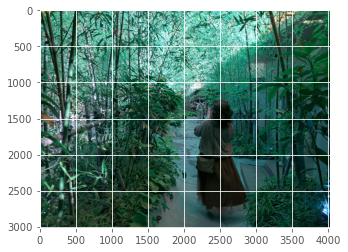

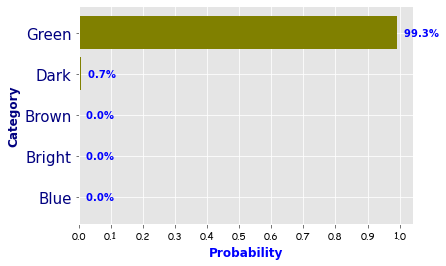

'done'

In [8]:
# This section is for testing a trained CNN on any image
from keras.models import load_model
import matplotlib.pyplot as plt
import numpy as np
cv2.destroyAllWindows()


# load 
width = 32
height = 32
#myImagePath = "C:\\Users\\MT\\Desktop\\Bacup\\IMG_20201031_151051.jpg"
#myImagePath ="D:\\Nippon And Photos After in Finland\\IMG_20190614_072238.jpg"
myImagePath ="D:\\Nippon And Photos After in Finland\\IMG_20190616_162713.jpg"
#myImagePath ="D:\\Nippon And Photos After in Finland\\IMG_20190616_171355.jpg"
#myImagePath ="D:\\Nippon And Photos After in Finland\\IMG_20190616_184544.jpg"

image = cv2.imread(myImagePath)
output = image.copy()
image = cv2.resize(image, (width, height))

# scale
image = image.astype("float") / 255.0

# for a simple fully-connected network, flatten the image
image = image.flatten()
image = image.reshape((1, image.shape[0]))
preds = model.predict(image)
# find the class label index with the largest corresponding probability
index_of_max = preds.argmax(axis=1)[0]
label = lb.classes_[index_of_max]


text = "{}: {:.1f}%".format(label, preds[0][index_of_max] * 100)
cv2.putText(output, text, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (255, 255, 10), 2)

plt.imshow(output)
plt.show()

#semantic
if label_path == "structure":
    x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2], lb.classes_[3]]
    y = [ preds[0][0], preds[0][1], preds[0][2], preds[0][3]]

#appearance
if label_path == "appearance":
    x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2], lb.classes_[3], lb.classes_[4]]
    y = [ preds[0][0], preds[0][1], preds[0][2], preds[0][3], preds[0][4]]

#structural
if label_path == "semantic":
    x = [ lb.classes_[0], lb.classes_[1], lb.classes_[2], lb.classes_[3], lb.classes_[4], lb.classes_[5]]
    y = [ preds[0][0], preds[0][1], preds[0][2], preds[0][3], preds[0][4],preds[0][5]]

plt.barh(x, y, color='olive')

ticks_x = np.linspace(0, 1, 11)   # (start, end, number of ticks)
plt.xticks(ticks_x, fontsize=10, family='fantasy', color='black')
plt.yticks( size=15, color='navy' )
for i, v in enumerate(y):
    plt.text(v, i, "  "+str((v*100).round(1))+"%", color='blue', va='center', fontweight='bold')

#plt.title('Prediction Probability' + ', Section is ' + str(i_sect) + ', number of image is ' +str(number_of_section), family='serif', fontsize=15, style='italic', weight='bold', color='olive', loc='center', rotation=0)
plt.xlabel('Probability', fontsize=12, weight='bold', color='blue')
plt.ylabel('Category', fontsize=12, weight='bold', color='navy')

plt.show()


done = "done";
done ##it works! everything is imported!